<a href="https://colab.research.google.com/github/LucianoPer/NPL/blob/main/2_Words_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Representacion de palabras en vectores

La representacion de las palabras (tokens) del corpus se realiza mediante  vectores de 'd' dimensiones, lo que solemos llamar representacion densa. Mediante esta representacion vectorial podemos definir distancias entre vectores: Euclidea, Coseno, Jaccards etc. Esta distancia nos va a permitir entender y comparar los documentos. 

Las representaciones vectoriales pueden realizarse de diferentes maneras:

- Redes neuronales simples ( Glove , FastText )
- Redes Recurrentes 
- Redes Seq2Seq
- Redes con contexto ( Elmo , Bert )

### Representacion mediante ONE-HOT vector

Cada palabra es un vector que pertene a [n x 1] donde n es la cantidad de palabras en el corpus. Esta representacion no tiene concepto de similaridad.

### Representacion mediante SVD ( Sigular value descomposition )

Construimos una matriz de coocurrencias $X$, y luego su descomposicion en valores singulares $X=U*S*V$. Una vez que tenemos la descomposicion nos quedamos con los k valores mas relevantes, donde k << cantidad total de palabras del corpus. El vector $U$ sera la representacion de nuestros embeddings de palabras, las dimensiones de la salida tendra la misma cantidad de filas que X pero descartando las columnas que contienen menos informacion y nos quedamos con las k columnas que contienen mas informacion.  
La matriz de coocurrencias establece una relacion de cada palabra con las palabras que tiene a su izquierda y a su derecha, construyendo asi un contexto, pero bastante limitado ya que solo tiene en cuenta las palabras que estan al lado, es decir, no tiene en cuenta las relaciones de 2do, 3er y 4to orden. 

### Representacion mediante Deep Learning: **Word2Vect**
- CBOW : Continuous Bag of Words
- Skip-Gram

Utilizamos como funcion de loss la Binary Crossentropy y como optimizador SGD-Mini Batch + Negative Sampling

## **CBOW**

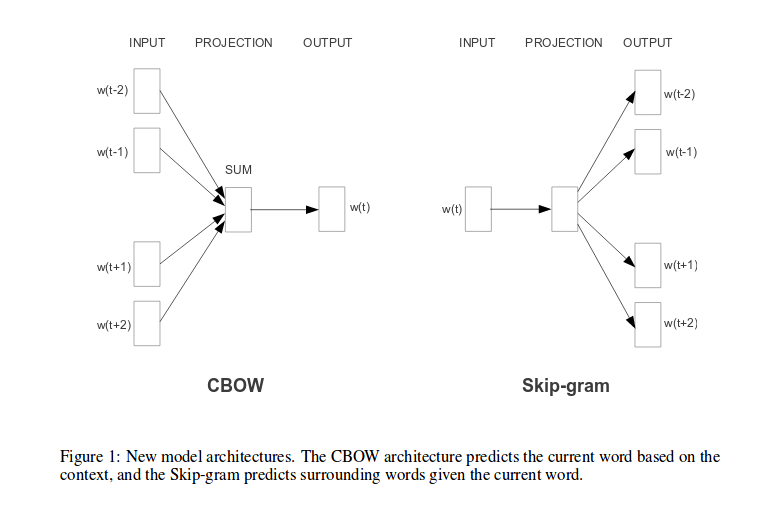

La entrada de la arquitectura CBOW es la matriz de contexto de la palabra que queremos predecir, esa matriz contiene informacion de palabras que se encuentran a la derecha y a la izquiera de la palabra a predecir. La salida de la red es un vector ONE-HOT Encoding que indica la palabra resultante de la prediccion.

La entrada de la arquitectura Skip-Gram es exactamente al reves de CBow, como entrada tenemos la palabra central y las predicciones son las palabras contextuales.  La salida es un vector con las probabilidades de las palabras del contexto de la palabra central. 

**Negative Sampling**: En resumen el negative sampling agrega "n" palabras negativas, es decir que no estan en el contexto, a la funcion de costo. Es un hiperparametro de optimizacion. Simplifica el calculo de la funcion de costo 

**Evaluacion de embeddings** : Las maneras de evaluar embeddings son :
- Extrinsecas : Consiste por ejemplo en entrenar un clasificador de sentimientos y calcular una metrica como AUC para diferentes embeddings
- Intrinsecas: Consiste en realizar analogias consistentes mediante productos internos que permitan obtener relaciones equivalentes, sentidos semanticos,  entre palabras. Ej : $Rey - Reina = Actriz - Actor$ 



## Implementacion Word2Vec

Ejemplo con letras de canciones de Prince

In [ ]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from google.colab.data_table import DataTable
import matplotlib.pyplot as plt
import multiprocessing
from gensim.models import Word2Vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos el dataset de prince utilizamos como separador de documentos el cambio de linea
df = pd.read_csv('/content/drive/MyDrive/NLP/songs_dataset/prince.txt', sep='/n', header=None)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,0
0,All of this and more is for you
1,"With love, sincerity and deepest care"
2,My life with you I share
3,"Ever since I met you, baby"
4,I've been wantin' to lay you down


In [ ]:
print('Dimensiones del dataset :', df.shape)

Dimensiones del dataset : (9616, 1)


In [ ]:
df.loc[0,0]

'All of this and more is for you'

In [ ]:
from keras.preprocessing.text import text_to_word_sequence

# Devuelve como vector las palabras de la oracion pasada como argumento (df.loc[0,0])
tokens=text_to_word_sequence(df.loc[0,0]) 

tokens

['all', 'of', 'this', 'and', 'more', 'is', 'for', 'you']

In [ ]:
# Aplicamos la funcion para tokenizar en todas las lineas del dataset

lista_tokens = []
for _,row in df[:None].iterrows():
  lista_tokens.append(text_to_word_sequence(row[0])) # iterrows devuelve el numero de fila y la cadena de texto de cada fila. 

In [ ]:
lista_tokens[:20]

[['all', 'of', 'this', 'and', 'more', 'is', 'for', 'you'],
 ['with', 'love', 'sincerity', 'and', 'deepest', 'care'],
 ['my', 'life', 'with', 'you', 'i', 'share'],
 ['ever', 'since', 'i', 'met', 'you', 'baby'],
 ["i've", 'been', "wantin'", 'to', 'lay', 'you', 'down'],
 ['but', "it's", 'so', 'hard', 'to', 'get', 'you'],
 ['baby', 'when', 'you', 'never', 'come', 'around'],
 ['every', 'day', 'that', 'you', 'keep', 'it', 'away'],
 ['it', 'only', 'makes', 'me', 'want', 'it', 'more'],
 ['ooh', 'baby', 'just', 'say', 'the', 'word'],
 ['and', "i'll", 'be', 'at', 'your', 'door'],
 ['what', 'more', 'do', 'i', 'have', 'to', 'say'],
 ['i', 'really', 'wanna', 'play', 'in', 'your', 'river'],
 ["fallin'", "fallin'", "fallin'", 'in', 'love'],
 ["i'm", "fallin'", 'baby', 'deeper', 'every', 'day'],
 ['in', 'love'],
 ["you're", "breakin'", 'my', 'heart', 'and', "takin'", 'me', 'away'],
 ['in', 'love'],
 ["i'm", "fallin'", 'baby', 'girl', 'what', 'can', 'i', 'do'],
 ['i', 'just', "can't", 'be', 'without', 

In [ ]:
# definimos el modelo 
word2vec_model = Word2Vec(min_count=3, # min cantidad de palabras para incluir
                     window=2, # cant de palabras antes y desp de la predicha
                     size=300,  # dimensionalidad de los vectores 
                     workers=1)

In [ ]:
# Construimos el modelo
word2vec_model.build_vocab(lista_tokens,progress_per=10000)

In [ ]:
# Entrenamos el modelo 
word2vec_model.train(lista_tokens, total_examples=word2vec_model.corpus_count, epochs=30, report_delay=1)

(1284063, 1894530)

In [ ]:
# Cantidad de documentos (filas):
word2vec_model.corpus_count

9616

In [ ]:
# Cantidad de palabras
len(word2vec_model.wv.vocab)

1670

In [ ]:
# palabras que MAS se relacionan :
word2vec_model.wv.most_similar(positive=["never"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('satisfied', 0.73655104637146),
 ('ending', 0.7145086526870728),
 ('before', 0.6851354837417603),
 ('since', 0.6810085773468018),
 ('ever', 0.6683914661407471),
 ('even', 0.656496524810791),
 ('always', 0.65498948097229),
 ('anything', 0.6479166746139526),
 ("wouldn't", 0.6465522050857544),
 ('young', 0.6392118334770203)]

In [ ]:
# palabras que MENOS se relacionan :
word2vec_model.wv.most_similar(negative=["never"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('tonight', 0.29583245515823364),
 ('house', 0.29206112027168274),
 ('paris', 0.24257147312164307),
 ('temple', 0.22167903184890747),
 ('aahhh', 0.19912028312683105),
 ('blue', 0.19704045355319977),
 ('f', 0.1881086230278015),
 ('d', 0.18048778176307678),
 ('alright', 0.17604976892471313),
 ('thieves', 0.17518235743045807)]

In [ ]:
# Vocabulario
word2vec_model.wv.vocab

{'all': <gensim.models.keyedvectors.Vocab at 0x7fd8dfd19d30>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7fd8dfd19a58>,
 'this': <gensim.models.keyedvectors.Vocab at 0x7fd8dfd19f60>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7fd8dfd01550>,
 'more': <gensim.models.keyedvectors.Vocab at 0x7fd8dfd01780>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fd8fbb7a1d0>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fd8fbb7a240>,
 'you': <gensim.models.keyedvectors.Vocab at 0x7fd8b1d6c588>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7fd8b1d6c390>,
 'love': <gensim.models.keyedvectors.Vocab at 0x7fd8b1d6c400>,
 'care': <gensim.models.keyedvectors.Vocab at 0x7fd8b1d6c4e0>,
 'my': <gensim.models.keyedvectors.Vocab at 0x7fd8b06f8048>,
 'life': <gensim.models.keyedvectors.Vocab at 0x7fd8b06f8080>,
 'i': <gensim.models.keyedvectors.Vocab at 0x7fd8b06f80b8>,
 'share': <gensim.models.keyedvectors.Vocab at 0x7fd8b06f80f0>,
 'ever': <gensim.models.keyedvectors.Vocab at 0x7fd8b06f8128>,
 'si

In [ ]:
# Para poder hacer mas manejable el vocabulario lo convertimos a diccionario

w2v_vocab = dict()
for item in word2vec_model.wv.vocab:
  w2v_vocab[item] = word2vec_model.wv.vocab[item].count


In [ ]:
#w2v_vocab

In [ ]:
# Ordenamos el diccionario para que aparezcan primero las palabras mas frecuentes
w2v_vocab_ord = sorted(w2v_vocab.items(), key=lambda x: x[1], reverse=True)

w2v_vocab_ord

[('the', 2221),
 ('u', 2057),
 ('i', 1920),
 ('a', 1186),
 ('2', 1107),
 ('and', 1050),
 ('me', 896),
 ('it', 820),
 ('in', 810),
 ('your', 628),
 ('that', 604),
 ('my', 593),
 ('love', 591),
 ('do', 576),
 ('all', 575),
 ('we', 571),
 ('you', 560),
 ('on', 543),
 ('yeah', 532),
 ('baby', 526),
 ('be', 525),
 ('is', 508),
 ('of', 469),
 ("don't", 458),
 ('to', 454),
 ('4', 440),
 ("i'm", 437),
 ('so', 399),
 ('if', 394),
 ('go', 387),
 ('come', 374),
 ('just', 368),
 ('oh', 368),
 ('this', 362),
 ('what', 312),
 ('with', 311),
 ('got', 309),
 ('no', 308),
 ('when', 306),
 ('can', 298),
 ('get', 295),
 ('like', 295),
 ('say', 291),
 ('will', 283),
 ('wanna', 281),
 ('know', 274),
 ("it's", 261),
 ('up', 260),
 ('time', 257),
 ('but', 249),
 ('want', 237),
 ('gonna', 232),
 ('down', 224),
 ('la', 214),
 ('now', 209),
 ('are', 187),
 ("can't", 185),
 ('was', 184),
 ("i'll", 178),
 ('see', 175),
 ('they', 174),
 ('there', 165),
 ('how', 160),
 ('tell', 159),
 ("that's", 157),
 ('have', 155

## Cargamos otro texto

In [ ]:
df2 = pd.read_csv('https://s3.amazonaws.com/text-datasets/nietzsche.txt', sep='/n', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
lista_tokens2 = []
for _,rows in df2[:None].iterrows():
  lista_tokens2.append(text_to_word_sequence(rows[0]))

In [ ]:
lista_tokens2[:5]

[['preface'],
 ['supposing',
  'that',
  'truth',
  'is',
  'a',
  'woman',
  'what',
  'then',
  'is',
  'there',
  'not',
  'ground'],
 ['for',
  'suspecting',
  'that',
  'all',
  'philosophers',
  'in',
  'so',
  'far',
  'as',
  'they',
  'have',
  'been'],
 ['dogmatists',
  'have',
  'failed',
  'to',
  'understand',
  'women',
  'that',
  'the',
  'terrible'],
 ['seriousness',
  'and',
  'clumsy',
  'importunity',
  'with',
  'which',
  'they',
  'have',
  'usually',
  'paid']]

### Skip-Gram 
Para aplicar skip-gram debemos cambiar el parametro sg = 0 (por defecto)   el cual indica que estamos utilizando CBOW, por sg = 1 , para indicar que vamos a realizar skip-gram. Ademas podemos utilizar el parametro 'negative' para indicar el uso de negative samples.  

In [ ]:
# Definimos el modelo 2 para el texto de Nietzsche utilizando Skip-gram

word2vec_model2 = Word2Vec(min_count=5,
                     window=2,
                     size=300, 
                     negative=20, # cantidad de negative samples... 0 es no se usa
                     workers=1, # Cantidad de cores, como tenemos 2 lo recomendable es usar siempre uno menos. 
                     sg=1) # modelo skipgram


In [ ]:
# Creamos el modelo y lo entrenamos 
word2vec_model2.build_vocab(lista_tokens2, progress_per=10000)


In [ ]:
word2vec_model2.train(lista_tokens2, total_examples=word2vec_model2.corpus_count, epochs=30)

(1783394, 3040740)

In [ ]:
print('El corpus es de {} documentos (filas) '.format(word2vec_model2.corpus_count))
print('El vocabulario contiene {} palabras '.format( len(word2vec_model2.wv.vocab))) 

El corpus es de 9037 documentos (filas) 
El vocabulario contiene 2170 palabras 


In [ ]:
word2vec_model2.wv.most_similar(positive=["never"], topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('fain', 0.7002431154251099),
 ('possibly', 0.6885519027709961),
 ('cut', 0.683098554611206),
 ('taught', 0.6824251413345337),
 ('teach', 0.6766998767852783),
 ('resolution', 0.6622889041900635),
 ('insist', 0.6539020538330078),
 ('cease', 0.6506303548812866),
 ('dare', 0.6494653224945068),
 ('venture', 0.6487270593643188)]

### Para ver la evolucion del modelo durante el entrenamiento definimos un callbacks

In [ ]:
from gensim.models.callbacks import CallbackAny2Vec
# init callback class 
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [ ]:

word2vec_model2 = Word2Vec(min_count=5,
                     window=10,
                     size=300, 
                     negative=20, # cantidad de negative samples... 0 es no se usa
                     workers=1, # Cantidad de cores, como tenemos 2 lo recomendable es usar siempre uno menos. 
                     sg=1) # modelo skipgram


In [ ]:
# Creamos el modelo y lo entrenamos 
word2vec_model2.build_vocab(lista_tokens2, progress_per=10000)

In [ ]:
word2vec_model2.train(lista_tokens2, total_examples=word2vec_model2.corpus_count, epochs=30, compute_loss = True, callbacks=[callback()])

Loss after epoch 0: 1009300.6875
Loss after epoch 1: 945060.3125
Loss after epoch 2: 876200.0
Loss after epoch 3: 864572.0
Loss after epoch 4: 831301.0
Loss after epoch 5: 789431.5
Loss after epoch 6: 785042.5
Loss after epoch 7: 782321.0
Loss after epoch 8: 773077.0
Loss after epoch 9: 766516.0
Loss after epoch 10: 719849.0
Loss after epoch 11: 716697.0
Loss after epoch 12: 713829.0
Loss after epoch 13: 710845.0
Loss after epoch 14: 709238.0
Loss after epoch 15: 705983.0
Loss after epoch 16: 703339.0
Loss after epoch 17: 700544.0
Loss after epoch 18: 695452.0
Loss after epoch 19: 695084.0
Loss after epoch 20: 690419.0
Loss after epoch 21: 690057.0
Loss after epoch 22: 643092.0
Loss after epoch 23: 646930.0
Loss after epoch 24: 643290.0
Loss after epoch 25: 638260.0
Loss after epoch 26: 637430.0
Loss after epoch 27: 632444.0
Loss after epoch 28: 628968.0
Loss after epoch 29: 626898.0


(1783357, 3040740)

In [ ]:
# Achicamos la ventana a valor 1 y evaluamos la loss, esto va a dar valores mas bajos ya que teniamos oraciones muy cortas 

word2vec_model2 = Word2Vec(min_count=5,
                     window=1,
                     size=300, 
                     negative=20, # cantidad de negative samples... 0 es no se usa
                     workers=1, # Cantidad de cores, como tenemos 2 lo recomendable es usar siempre uno menos. 
                     sg=1) # modelo skipgram

In [ ]:
# Creamos el modelo y lo entrenamos 
word2vec_model2.build_vocab(lista_tokens2, progress_per=10000)

In [ ]:
word2vec_model2.train(lista_tokens2, total_examples=word2vec_model2.corpus_count, epochs=30, compute_loss = True, callbacks=[callback()])

Loss after epoch 0: 623955.1875
Loss after epoch 1: 422128.3125
Loss after epoch 2: 360803.5
Loss after epoch 3: 356918.125
Loss after epoch 4: 349854.375
Loss after epoch 5: 304937.75
Loss after epoch 6: 302625.0
Loss after epoch 7: 302585.25
Loss after epoch 8: 300574.0
Loss after epoch 9: 298282.5
Loss after epoch 10: 296829.0
Loss after epoch 11: 293983.5
Loss after epoch 12: 277142.0
Loss after epoch 13: 273663.0
Loss after epoch 14: 273095.5
Loss after epoch 15: 270649.5
Loss after epoch 16: 267937.5
Loss after epoch 17: 266752.5
Loss after epoch 18: 263866.0
Loss after epoch 19: 263161.5
Loss after epoch 20: 261364.0
Loss after epoch 21: 259261.0
Loss after epoch 22: 257665.0
Loss after epoch 23: 256960.5
Loss after epoch 24: 255011.0
Loss after epoch 25: 253490.0
Loss after epoch 26: 253829.5
Loss after epoch 27: 251768.0
Loss after epoch 28: 241066.0
Loss after epoch 29: 239731.0


(1783052, 3040740)

In [ ]:
# Cantidad de palabras del corpus y tam del vector de cada palabra
word2vec_model2.wv.vectors.shape

(2170, 300)

In [ ]:
# Palabras del corpus
word2vec_model2.wv.index2word


['the',
 'of',
 'and',
 'to',
 'in',
 'is',
 'a',
 'that',
 'it',
 'as',
 'for',
 'which',
 'be',
 'not',
 'with',
 'he',
 'all',
 'this',
 'are',
 'his',
 'one',
 'has',
 'or',
 'an',
 'but',
 'have',
 'at',
 'we',
 'they',
 'who',
 'man',
 'their',
 'from',
 'more',
 'will',
 'by',
 'so',
 'its',
 'there',
 'what',
 'on',
 'i',
 'such',
 'even',
 'only',
 'our',
 'no',
 'himself',
 'them',
 'itself',
 'most',
 'when',
 'if',
 'was',
 'him',
 'every',
 'been',
 'men',
 'also',
 'must',
 'would',
 'good',
 'us',
 'may',
 'perhaps',
 'can',
 'how',
 'upon',
 'world',
 'than',
 'life',
 'does',
 'self',
 'still',
 'other',
 'things',
 'into',
 'very',
 'do',
 'nature',
 'own',
 'any',
 'something',
 'like',
 'always',
 'these',
 'out',
 'should',
 'too',
 'great',
 'much',
 'were',
 'time',
 'soul',
 'themselves',
 'without',
 'now',
 'had',
 'being',
 'new',
 'some',
 'same',
 'spirit',
 'love',
 'morality',
 'say',
 'moral',
 'those',
 'about',
 'means',
 'god',
 'you',
 'because',
 'h

In [ ]:
# Funcion para realizar el grafico

from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                   
import numpy as np                                  

def reduce_dimensions(model):
    num_dimensions = 2  

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index2word)  

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [ ]:
# REDUCCION DE DIM
x_vals, y_vals, labels = reduce_dimensions(word2vec_model)

In [ ]:
# GRAFICAMOS CON PLOTLY
import plotly.graph_objects as go
import plotly.express as px

MAX_WORDS=200
fig = px.scatter(x=x_vals[:MAX_WORDS], y=y_vals[:MAX_WORDS], text=labels[:MAX_WORDS])

fig.show(renderer="colab") # esto para plotly en colab

### Canciones de Bob Dylan

In [ ]:
# Cargamos el dataset de bob dylan
df3 = pd.read_csv('/content/drive/MyDrive/NLP/songs_dataset/bob-dylan.txt', sep='/n', header=None)
df3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,0
0,"“There must be some way out of here,” said the..."
1,"“There’s too much confusion, I can’t get no re..."
2,"Businessmen, they drink my wine, plowmen dig m..."
3,None of them along the line know what any of i...
4,"“No reason to get excited,” the thief, he kind..."


In [ ]:
lista_tokens3 = []
for _,rows in df3[:None].iterrows():
  lista_tokens3.append(text_to_word_sequence(rows[0]))

In [ ]:
lista_tokens3

[['“there',
  'must',
  'be',
  'some',
  'way',
  'out',
  'of',
  'here',
  '”',
  'said',
  'the',
  'joker',
  'to',
  'the',
  'thief'],
 ['“there’s', 'too', 'much', 'confusion', 'i', 'can’t', 'get', 'no', 'relief'],
 ['businessmen',
  'they',
  'drink',
  'my',
  'wine',
  'plowmen',
  'dig',
  'my',
  'earth'],
 ['none',
  'of',
  'them',
  'along',
  'the',
  'line',
  'know',
  'what',
  'any',
  'of',
  'it',
  'is',
  'worth”'],
 ['“no',
  'reason',
  'to',
  'get',
  'excited',
  '”',
  'the',
  'thief',
  'he',
  'kindly',
  'spoke'],
 ['“there',
  'are',
  'many',
  'here',
  'among',
  'us',
  'who',
  'feel',
  'that',
  'life',
  'is',
  'but',
  'a',
  'joke'],
 ['but',
  'you',
  'and',
  'i',
  'we’ve',
  'been',
  'through',
  'that',
  'and',
  'this',
  'is',
  'not',
  'our',
  'fate'],
 ['so',
  'let',
  'us',
  'not',
  'talk',
  'falsely',
  'now',
  'the',
  'hour',
  'is',
  'getting',
  'late”'],
 ['all', 'along', 'the', 'watchtower', 'princes', 'kept', 't

In [ ]:
# Creamos un modelo CBOW con una ventana de 2 

word2vec_model3 = Word2Vec(min_count=5, # min cantidad de palabras para incluir
                     window=2, # cant de palabras antes y desp de la predicha
                     size=300,  # dimensionalidad de los vectores 
                     workers=1)

In [ ]:
# Creamos el modelo y lo entrenamos 
word2vec_model3.build_vocab(lista_tokens3, progress_per=10000)

In [ ]:
word2vec_model3.train(lista_tokens3, total_examples=word2vec_model3.corpus_count, epochs=30, compute_loss = True, callbacks=[callback()])

Loss after epoch 0: 93428.84375
Loss after epoch 1: 79202.578125
Loss after epoch 2: 67209.3125
Loss after epoch 3: 63533.890625
Loss after epoch 4: 62622.6875
Loss after epoch 5: 61992.5
Loss after epoch 6: 62010.9375
Loss after epoch 7: 61440.3125
Loss after epoch 8: 61260.25
Loss after epoch 9: 60775.5
Loss after epoch 10: 60489.375
Loss after epoch 11: 59832.125
Loss after epoch 12: 59292.0625
Loss after epoch 13: 58051.0
Loss after epoch 14: 57532.375
Loss after epoch 15: 57030.4375
Loss after epoch 16: 56640.3125
Loss after epoch 17: 56208.125
Loss after epoch 18: 55020.875
Loss after epoch 19: 55569.125
Loss after epoch 20: 54562.5
Loss after epoch 21: 53986.75
Loss after epoch 22: 53594.5
Loss after epoch 23: 53383.25
Loss after epoch 24: 52806.0
Loss after epoch 25: 52728.375
Loss after epoch 26: 52453.875
Loss after epoch 27: 52039.625
Loss after epoch 28: 52511.25
Loss after epoch 29: 51987.5


(664564, 1152450)

In [ ]:
# Cantidad de palabras del corpus y tam del vector de cada palabra
word2vec_model3.wv.vectors.shape

(948, 300)

In [ ]:
# REDUCCION DE DIM
x_vals2, y_vals2, labels2 = reduce_dimensions(word2vec_model3)

In [ ]:
MAX_WORDS=200
fig = px.scatter(x=x_vals2[:MAX_WORDS], y=y_vals2[:MAX_WORDS], text=labels2[:MAX_WORDS])

fig.show(renderer="colab") # esto para plotly en colab

In [ ]:
# Vector de una palabra especifica
word2vec_model3['heart']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([-9.58247203e-03, -5.98235568e-03,  4.55381311e-02, -8.45187381e-02,
       -1.37000456e-01,  1.57928690e-01,  1.41994283e-01,  2.28859231e-01,
       -3.91463004e-03,  5.03098704e-02, -1.11826628e-01, -2.54888050e-02,
       -4.07608971e-02, -9.85952392e-02,  1.27580449e-01,  2.43764129e-02,
        2.25758646e-02, -6.25931397e-02,  2.21782491e-01,  2.81175878e-02,
        2.77215451e-01, -3.35030369e-02, -8.15120786e-02, -1.24792591e-01,
        1.19836755e-01,  1.36104850e-02,  4.40556854e-02, -3.70911360e-02,
       -1.12827392e-02,  6.92025125e-02, -1.16756067e-01, -8.41257721e-02,
        1.61443740e-01, -3.44472975e-02,  1.30244181e-01, -1.05021931e-01,
       -1.22268938e-01,  1.47215286e-02,  3.39502543e-02, -1.05413668e-01,
       -5.85833825e-02,  7.92793036e-02,  4.35586423e-02,  5.51449023e-02,
        4.85422276e-02,  9.13617611e-02, -6.29493445e-02, -2.17877284e-01,
       -8.01373366e-03, -8.83606523e-02, -1.36348963e-01, -8.19179937e-02,
       -1.22573130e-01,  

In [ ]:
word2vec_model3['heart'].shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



(300,)

In [ ]:
from scipy import spatial

index2word_set = set(word2vec_model3.wv.index2word)

def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [ ]:
# Similitud coseno entre frases obtenidas de las canciones

s1 = avg_feature_vector('There must be some way out of here', model = word2vec_model3, num_features=300, index2word_set=index2word_set)
s2 = avg_feature_vector('No reason to get excited', model = word2vec_model3, num_features=300, index2word_set=index2word_set)
s3 = avg_feature_vector('There’s too much confusion', model = word2vec_model3, num_features=300, index2word_set=index2word_set)

sim = 1 - spatial.distance.cosine(s1, s2)
print('La similitud coseno es : ', sim)

La similitud coseno es :  0.6612840294837952


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [ ]:
sim = 1 - spatial.distance.cosine(s3, s2)
print('La similitud coseno es : ', sim)

La similitud coseno es :  0.39885270595550537


In [ ]:
sim = 1 - spatial.distance.cosine(s1, s3)
print('La similitud coseno es : ', sim)

La similitud coseno es :  0.4392413794994354


In [ ]:
# Similitud coseno entre dos palabras cercanas del grafico

sim = 1 - spatial.distance.cosine(word2vec_model3['old'], word2vec_model3['world'])
print('La similitud coseno es : ', sim)

La similitud coseno es :  0.8720864653587341


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [ ]:
# Similitud coseno entre dos palabras lejanas del grafico

sim = 1 - spatial.distance.cosine(word2vec_model3['things'], word2vec_model3['need'])
print('La similitud coseno es : ', sim)

La similitud coseno es :  0.2665281891822815


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [ ]:
# Top ten de palabras mas relacionadas con love
word2vec_model3.wv.most_similar(positive=["love"], topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('shot', 0.896576464176178),
 ('need', 0.8643895387649536),
 ('true', 0.795914888381958),
 ('sick', 0.7366281747817993),
 ('kind', 0.7314656972885132),
 ('help', 0.7045071125030518),
 ('fell', 0.6912363767623901),
 ('like', 0.6882295608520508),
 ('mine', 0.6594409942626953),
 ('woman', 0.6542736291885376)]

In [ ]:
sim = 1 - spatial.distance.cosine(word2vec_model3['love'], word2vec_model3['shot'])
print('La similitud coseno es : ', sim)

La similitud coseno es :  0.8965765237808228


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [ ]:
# Top ten de palabras menos relacionadas con love
word2vec_model3.wv.most_similar(negative=["love"], topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('up', 0.0913277193903923),
 ('around', -0.02091619372367859),
 ('wake', -0.02554587833583355),
 ('they', -0.0332169272005558),
 ('when', -0.04874572902917862),
 ('down', -0.05566231161355972),
 ('he', -0.057557422667741776),
 ('the', -0.05786993354558945),
 ('are', -0.06250538676977158),
 ('door', -0.07189352810382843)]

In [ ]:
# Realizamos la prediccion de la palabra que compone la frase

word = word2vec_model3.predict_output_word(['None','of', 'them' ,'along', 'line'], topn = 3)
print(word)

[('night', 0.0028574122), ('by', 0.0028424177), ('town', 0.002750973)]
